![](fig/univ.png)

# AI0: The Basics of Data Science
## Homework 2: Linear Regression & Classification

**Univ.AI**<br/>

<hr style="height:2.4pt">

In [369]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### INSTRUCTIONS


- This homework is a jupyter notebook. You can work on it on Ed (recommended) or download to your local machine and uploade a copy without deleting the ### edTest ### cells.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the import statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- This homework is autograded. You can submit as many times as you need to get it right before the deadline.

<hr style="height:2pt">

## Section 1: Regression

In [370]:
# EDIT THIS CODE TO LOAD THE SAVED DF FROM THE LAST HOMEWORK
df = pd.read_csv('movies_clean.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Adventure,Action,TV Movie,War,Romance,Documentary,Science Fiction,Western,Thriller,Drama
0,8.374748,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",2.180234,"Ingenious Film Partners, Twentieth Century Fox...",...,1,1,0,0,0,0,1,0,0,0
1,8.477121,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2.146384,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,1,1,0,0,0,0,0,0,0,0
2,8.389166,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,2.034936,"Columbia Pictures, Danjaq, B24",...,1,1,0,0,0,0,0,0,0,0
3,8.397940,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,2.054280,"Legendary Pictures, Warner Bros., DC Entertain...",...,0,1,0,0,0,0,0,0,1,1
4,8.414973,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",1.652507,Walt Disney Pictures,...,1,1,0,0,0,0,1,0,0,0


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### Exercise 1

In Part 2 of this case study, we will primarily use the following two models: 
- Linear regression for prediction
- k-Nearest Neighbours (kNN) for classification 

We will use linear regression to predict revenue, and we will use kNN to classify whether a movie was profitable or not.

But first, we need to prepare the data to be used to perform regression using sklearn's implementation.

#### Instructions

- Define `regression_target` as `revenue` which is an entry in the original dataframe.
- Define `regression_outcome` as the selection of the labels in the `revenue` column.
- Use the `train_test_split()` function from sklearn to get indices (`itrain`, `itest`) so as to divide the original data. We will use `itrain` to index data to be used for training and `itest` to index data to be used for testing. Use a test size of 20\%.

</div>

In [371]:
# Define `regresssion_target` as 'revenue'
regression_target = 'revenue'

# Fetch the `regression_target` data from the df
regression_outcome = df[regression_target]

# Define a list containing the names of all features being used for model training
all_features = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']

#Fetch the dataframe containing data of all the features defined in `all_features`
features_df = df[all_features]

In [372]:
### edTest(test_1) ###
## DO NOT REMOVE ABOVE LINE ##

# Get the training and test data by performing train test split
# using sklearn's `train_test_split()` with test size as 20%. and random_state=43

# Note that we want to fetch the indices 
# therefore pass the range(len(df)) into the function 
itrain, itest =train_test_split(range(len(df)),test_size=0.2,random_state=43)

# Using itrain, fetch the X_train values from features_df
# HINT: use .iloc[itrain].values
X_train =features_df.iloc[itrain].values

# Using itrain, fetch the y_train values from regression_outcome
y_train =regression_outcome.iloc[itrain].values

# Using itest, fetch the X_test values from features_df
X_test = features_df.iloc[itest].values
print(X_test)

# Using itest, fetch the y_test values from regression_outcome
y_test = regression_outcome.iloc[itest].values
#print(y_test)

[[6.87506132 1.66848836 1.98227123 ... 0.         0.         0.        ]
 [7.17609129 1.30715636 2.0211893  ... 0.         0.         0.        ]
 [7.54406806 1.17693043 2.05307844 ... 0.         0.         0.        ]
 ...
 [7.07918128 0.80124684 2.06069784 ... 0.         0.         0.        ]
 [8.09691002 2.04526175 2.18469143 ... 0.         0.         0.        ]
 [7.47712127 1.5175515  1.97772361 ... 0.         0.         0.        ]]


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### Exercise 2

In this exercise, we will create a linear regression object, fit it on the training data and make predictions on the test data.
We will then measure its performance by using a metric called `r2_score`.
The `r2_score` is a measure of how well the linear regression describes the data (similar to accuracy in classification).
Read more about `r2_score` [here.](https://towardsdatascience.com/statistics-for-machine-learning-r-squared-explained-425ddfebf667)

For classification models in part 2, we will use accuracy as the performance measure.

#### Instructions 
- Instantiate a `LinearRegression()` object and name it `linear_regression`.
- Call its `.fit()` method on the `X_train,y_train` defined above.
- Call its `.predict()` method on `X_test` and store the predictions as `y_pred`.
- Use sklearn's implementation of `r2_score()` and report its value.

</div>

In [373]:
### edTest(test_2) ###
## DO NOT REMOVE ABOVE LINE ##

# Instantiate a LinearRegression object using sklearn
linear_regression = LinearRegression()

# Fit X_train and y_train using linear_regression object

linear_regression.fit(X_train,y_train)
# Call predict on linear_regression object using X_test
y_pred = linear_regression.predict(X_test)

# Calculate r2_score by using sklearn's built-in function for the same
r2score = r2_score(y_test,y_pred)
print(f"Model R2 Score is {r2score:.2f}")

Model R2 Score is 0.46


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### Exercise 3

In Exercise 2, we saw that predicting revenue was only moderately successful. It might be the case that predicting movies with actually zero revenue is difficult. 

In this exercise, we will exclude these movies, and re-run the analyses to determine if the fits improve. 

One may understand this as 'cleaning' the outliers, a step often performed in order to make sure that these extreme values do not mess with the data distribution. 

In this exercise, we will rerun the regression analysis for this subsetted dataset without the so-called 'outliers'.

#### Instructions

- Define `positive_revenue_df` as the subset of movies in `df` with `revenue` greater than zero.
- Make a function that automates the splitting of the dataframes from before.

</div>

In [374]:
# Fetch subset of df that contains 'revenue' > 0
positive_revenue_df =df[df.revenue > 0]
# Fetch the `regression_target` data from the positive_revenue_df
regression_outcome =positive_revenue_df[regression_target]

#Fetch the dataframe containing data of all the features defined in `all_features` above
#remember to use `positive_revenue_df` instead
features_df =positive_revenue_df[all_features]

In [375]:
# As we will repeatedly split the data, let's modularize the train_test_split steps in function
# Input: features_dataframe, regression_outcome, test_size
# Output: X_train, y_train, X_test, y_test
def get_datasets(features, outcome, test_size):
    
    # Get the training and test data by performing train test split as above
    # Remember to use the test_size as mentioned in the function parameter and random_state = 43
    itrain, itest =train_test_split(range(len(features)),test_size=test_size,random_state=43)
    
    # Using itrain, fetch the X_train values from features
    X_train =  features.iloc[itrain].values
    
    # Using itrain, fetch the y_train values from outcome
    y_train =outcome.iloc[itrain].values
    
    # Using itest, fetch the X_test values from features
    X_test =features.iloc[itest].values
    
    # Using itest, fetch the y_test values from outcome
    y_test = outcome.iloc[itest].values

    return X_train, y_train, X_test, y_test

In [376]:
### edTest(test_3) ###
## DO NOT REMOVE ABOVE LINE ##

# Call the `get_datasets` function on the `features_df` 
# with test size 20% and `regression_outcome`
X_train, y_train, X_test, y_test =  get_datasets(features_df,regression_outcome,test_size=0.2)



# Reinstantiate the regression model
linear_regression =LinearRegression()

# Fit X_train and y_train using linear_regression object
linear_regression.fit(X_train,y_train)

# Call predict on linear_regression object using X_test
ypred=linear_regression.predict(X_test)

# Calculate the r2_score using sklearn's built-in function
# This score should not match the score from the previous section!
r2score =r2_score(y_test,ypred)
print(f"Model R2 Score is {r2score:.2f}")

Model R2 Score is 0.64


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
## Section 2: Classification

In this section, we will attempt to classify if a movie is `profitable` or not. To do so, we will use the k-Nearest neighbours classification algorithm. Below is an overview of the algorithm for performing k-NN classification.

**k Nearest Neighbours Algorithm**

1. Load the training data

2. Initialize `k` to your chosen number of nearest neighbors.

3. Calculate the distances between the test example and every training example using euclidean distances.

4. Find the first `k` *nearest* training entries.

5. Get the labels of the selected `k` entries.

6. Get the most frequent label among the `k` entries.

7. In case of tie, flip a coin and pick one of the two labels.

![](https://i.ibb.co/zGWG1MT/knn-classify.png)

Read [this](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761) article for a through introduction to the kNN algorithm.

</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### Exercise 4

Before you build your own kNN classifier, let us prepare the the data.

#### Instructions 

- Define `classification_target` as `profitable` which is an entry in the original dataframe.
- Define `classification_outcome` as the selection of the labels in the `profitable` column.
- Use the same split (`itrain`, `itest`) as before but this time select the output on the `classification_outcome` instead and name it as `y_train_classification` and `y_test_classification`.

</div>

In [377]:
# Define `classification_target` as 'profitable'
classification_target ='profitable'

# Fetch the `classification_target` data from the df
classification_outcome = df[classification_target]

# Define a list containing the names of all features being used for model training
all_features = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']

#Fetch the dataframe containing data of all the features defined in `all_features`
features_df =df[all_features]

In [378]:
### edTest(test_4) ###
## DO NOT REMOVE ABOVE LINE ##

# Call the `get_datasets` function on the `features_df`, `classification_outcome`
# and with test size 20% 
X_train, y_train_classification, X_test, y_test_classification = get_datasets(features_df,classification_outcome,test_size=0.2)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### Exercise 5

It's finally time to build your `myKNN` classifier class!

#### Instructions 
- follow the instructions is the `__init__` docstring
- Declare an instance method `fit`, which intializes two attributes, `self.X_train` and `self.y_train`.
- Declare an internal instance method called `_vote` which performs voting between the k nearest labels and returns an overall predicted label based on the count.
- Declare an instance method `predict` which takes test values, performs the k nearest neighbors search using the algorithm mentioned above, and returns a set of predicted labels. You will need your `_vote` method here. 

Follow the docstrings more for detailed instructions.

</div>

In [379]:
np.random.seed(310)

#Create your myKNN Class
class myKNN:
    
    def __init__(self, n_neighbors=3):
        """
        Initializes the classifier with the number of neighbors. 
        (Set a default value of 3). 
        Save the result as k. 
        """
        self.k = n_neighbors
    
    def fit(self, X_train, y_train):
        """
        Initializes instance variables X_train and y_train with 
        respective values.   .    
        """
        self.X_train = X_train
        self.y_train = y_train
        
    def _vote(self,labels):
        """
        Takes the labels of the nearest neighbors and returns the majority vote.
        e.g. For 4 nearest neighbors and labels [1,1,1,0], _vote() will return 1.
        INSTRUCTIONS
        1. take the mean vote for the self.k number of labels.
        2. if there is a tie (mean = 0.5), add to or subtract from `mean_vote` a random positive or negative amount
        3. if the mean vote is greater than 0.5 return 1, else return 0
        """

        # 1
        mean_vote = np.sum(labels)/self.k

        # 2
        if mean_vote == 0.5:
            mean_vote += np.random.choice()
        elif mean_vote >0.5:
            return 1
        else:
            return 0
        # 3
        return  mean_vote
        
    def predict(self,X_test):
        """If you have trouble with this exercise take a look again at exercise 2 from session 7: Fundamentals of numpy for datascience
        INSTRUCTIONS
        1. Calculate the distances between the test example and every training example using euclidean distances.
        2. Find the first k nearest training entries.
        Use np.argsort to find the indices of the nearest labels. Documentation for np.argsort here: https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
        3. cast the np.array to integers:
        4. apply the _vote method along the proper axis such that you return the majority vote
           for the nearest neighbors of each point in the test set
           Documentation for `np.apply_along_axis here => https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html
        """
        #1
        comparisons = np.sqrt(((self.X_train.reshape(1124, 1, 25) - X_test)**2).sum(axis=2))

        # 2
        nearest_neighbors = np.argsort(comparisons, axis=1)[:]

        # 3
        nearest_labels = np.array(nearest_neighbors)
        nearest_labels = nearest_labels.astype(int)
        
        # 4
        predictions = np.apply_along_axis(self._vote, axis=0, arr = nearest_labels)
        
        return predictions
        pass
                

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### Exercise 6

Time to use your `myKNN` classifier class to instantiate a classifer and make a prediction.

#### Instructions 

- Intialize an object of `myKNN` and name it `knn_classifier` with `k=4`.
- Call the `.fit()` method on `X_train` and `y_train`.
- Call the `.predict()` method on `X_test` and store the predictions as `classification_predictions`.
- Call the `accuracy_score` function and report the accuracy of the predictions as compared to `y_test`.

</div>

In [380]:
### edTest(test_5) ###
## DO NOT REMOVE ABOVE LINE ##

# Instantiate myKNN Classifier with 4 neighbours
knn_classifier =myKNN(4)

# Fit the trainin data on your newly instantiated classifier 
knn_classifier.fit(X_train,y_train_classification)
# Predict on test set using the trained classifer
classification_predictions =knn_classifier.predict(X_test)
print(classification_predictions)

# Get the accuracy score by using `accuracy_score` from sklearn.metrics
accuracy = accuracy_score(y_test_classification,classification_predictions)
print(f"Accuracy is {accuracy:.2f}")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy is 0.77


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### Exercise 7

Compare your implementation with the `sklearn`'s version of kNN classifier.

#### Instructions 

- Intialize the sklearn classifier with `n_neighbors=4` with the variable name `sknn`.
- Call the `.fit()` method of the classifier. 
- Call the `.predict()` method on `X_test` and store the predicted labels as `skclassification_predictions`.
- Call the `accuracy_score` function to compare the predictions with the test set.
- Compare the predictions of your custom classifier with the sklearn's implementation.

</div>

In [381]:
### edTest(test_6) ###
## DO NOT REMOVE ABOVE LINE ##

from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier with 4 neighbours
sknn = KNeighborsClassifier(4)

# Fit the training data
sknn.fit(X_train,y_train_classification)

# Predict on test set using the trained classifer
skclassification_predictions =sknn.predict(X_test)

# Get the accuracy score by using `accuracy_score` from sklearn.metrics
accuracy = accuracy_score(y_test_classification,skclassification_predictions)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.76


In [382]:
### edTest(test_7) ###
## DO NOT REMOVE ABOVE LINE ##

# Checking to see if predictions from both the classifiers are same
result = all(skclassification_predictions == classification_predictions)
print(result)

False


### ⏸ Pause & Think

Change the no. of neighbours from an 4 to 3 and perform comparisons on custom classifier vs. sklearn's classifier. Are the predictions still the same? What is the pattern you are observing?

```
A. Predictions are same for both classifiers when k is odd. 
B. Predictions are same for both classifiers when k is even. 
C. Predictions are same for both classifiers when k is prime. 
D. Predictions are same for both classifiers when k is multiple of 23.
```

In [383]:
### edTest(test_8) ###
## DO NOT REMOVE ABOVE LINE ##

#-------------CUSTOM---------------#

# Instantiate myKNN Classifier with 3 neighbours
knn_classifier = myKNN(3)

# Fit the training data
knn_classifier.fit(X_train,y_train_classification)

# Predict on the test set using the trained classifer
classification_predictions = knn_classifier.predict(X_test)

#------------SKLEARN--------------#

# Instantiate KNeighborsClassifier with 3 neighbours
sknn = KNeighborsClassifier()

# Fit the training data 
sknn.fit(X_train,y_train_classification)

# Predict on the test set 
skclassification_predictions =sknn.predict(X_test)

#------------COMPARISON--------------#
# Checking to see if predictions from both the classifiers are same
print(all(skclassification_predictions == classification_predictions))


#Mention your answer for the Pause & Think question here - for example: 'A'
answer = 'A'

False


## Investigation of the behaviour obeserved

Isn't it surprising to see the difference in the accuracy between odd and even no. of neighbours in our custom versus that of sklearn? Let's go investigate why this is happening.

In [384]:
# Function to flip labels i.e if ground truth label is 1, it will now be 0 
# and vice versa. 
def flip_labels(labels):
    return (labels + 1)%2

In [385]:
# Helper function to fit and run the data based on the input for custom or sklearn classifier
def fit_and_run(y_train, y_test, sk = True, n_neighbors = 3):
    if sk:
        sknn_ = KNeighborsClassifier(n_neighbors=n_neighbors)
        sknn_.fit(X_train,y_train)
        preds = sknn_.predict(X_test)
        acc_score = accuracy_score(preds,y_test)
        print(f'sklearn {acc_score}')
        return acc_score
    else:
        knn_ = myKNN(n_neighbors=n_neighbors)
        knn_.fit(X_train,y_train)
        preds = knn_.predict(X_test)
        acc_score = accuracy_score(preds,y_test)
        print(f'myknn {acc_score}')
        return acc_score

In [386]:
# Call the function defined below to  for sklearn
n_neighbors = 4
fit_and_run(y_train_classification, y_test_classification ,True, n_neighbors)
fit_and_run(flip_labels(y_train_classification), flip_labels(y_test_classification),True, n_neighbors)

sklearn 0.7624113475177305
sklearn 0.7943262411347518


0.7943262411347518

In [387]:
# Call the function defined above for custom implementation
fit_and_run(y_train_classification, y_test_classification, False, n_neighbors )
fit_and_run(flip_labels(y_train_classification), flip_labels(y_test_classification), False, n_neighbors)

myknn 0.7659574468085106
myknn 0.23404255319148937


0.23404255319148937

Flipping of labels should not necessarily affect the accuracy of the model since at the end, the model is looking at the same thing. To understand this better, imagine you are classifying if an image is that of a dog or cat. In one case the dog label can be represented as 1 and cat as 0, or vice versa. 

In both these cases, there is no impact on model training/accuracy since it is merely a representation choice. But why is it that we observe a difference in accuracy in sklearn's classifier?

In [388]:
# Run over several values of k and with the labels flipped
knn = []
knn_flipped=[]
sklearn = []
sklearn_flipped=[]

for n_neighbors in range(1, 50):
    knn1 = fit_and_run(y_train_classification, y_test_classification, False, n_neighbors )
    knn2 = fit_and_run(flip_labels(y_train_classification), flip_labels(y_test_classification), False, n_neighbors)
    sk1 = fit_and_run(y_train_classification, y_test_classification, True, n_neighbors )
    sk2 = fit_and_run(flip_labels(y_train_classification), flip_labels(y_test_classification), True, n_neighbors = n_neighbors)   
    knn.append(knn1)
    knn_flipped.append(knn2)
    sklearn.append(sk1)
    sklearn_flipped.append(sk2)

myknn 0.7659574468085106
myknn 0.23404255319148937
sklearn 0.776595744680851
sklearn 0.776595744680851
myknn 0.7659574468085106
myknn 0.23404255319148937
sklearn 0.7446808510638298
sklearn 0.8049645390070922
myknn 0.7659574468085106
myknn 0.23404255319148937
sklearn 0.7836879432624113
sklearn 0.7836879432624113
myknn 0.7659574468085106
myknn 0.23404255319148937
sklearn 0.7624113475177305
sklearn 0.7943262411347518
myknn 0.7659574468085106
myknn 0.23404255319148937
sklearn 0.7943262411347518
sklearn 0.7943262411347518
myknn 0.7659574468085106
myknn 0.23404255319148937
sklearn 0.7978723404255319
sklearn 0.8014184397163121
myknn 0.7659574468085106
myknn 0.23404255319148937
sklearn 0.8120567375886525
sklearn 0.8120567375886525
myknn 0.7659574468085106
myknn 0.23404255319148937
sklearn 0.8085106382978723
sklearn 0.8049645390070922
myknn 0.7659574468085106
myknn 0.23404255319148937
sklearn 0.8085106382978723
sklearn 0.8085106382978723
myknn 0.7659574468085106
myknn 0.23404255319148937
sklear

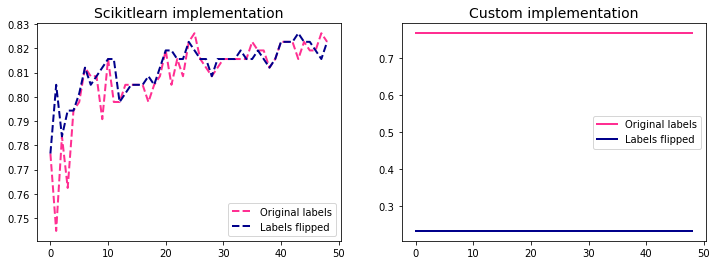

In [389]:
# Run this cell below to visualize the output
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(sklearn, '--',label = 'Original labels',color = '#FF2F92',lw=2)
ax[0].plot(sklearn_flipped, '--',label = 'Labels flipped',color='darkblue',lw=2)
ax[0].set_title('Scikitlearn implementation',fontsize=14)
ax[1].plot(knn,label='Original labels',color='#FF2F92',lw=2)
ax[1].plot(knn_flipped,label='Labels flipped',color='darkblue',lw=2)
ax[1].set_title('Custom implementation',fontsize=14)

for i in ax:
    i.legend()

Upon investigation of the method employed to classify labels that are exactly mid point between two choices, sklearn's classifier is made to choose the default answer as the least-value label. 

For example, if we had [1,0,1,0,1,0], where there are equal numbers of 1 and equal numbers of 0, what would the KNN Classifer classify this as? In the case of sklearn's implementation it seems to be taking 0, the least-value label. By obersving the last graph visualized, clearly the accuracy in sklearn seems to be hindered due to this method of implementation. 

However, when you implemented your own KNNClassifer, remember that in the case of an equal mean case, we randomly add or subract a number from the `mean_vote`. This has improved the accuracy, allowing for the model to perform relatively better than sklearn's implementation! 